# Loading the dataset from Kaggle

In [179]:
import kagglehub
path = kagglehub.dataset_download("arjuntejaswi/plant-village")

Using Colab cache for faster access to the 'plant-village' dataset.


In [180]:
import os

for item in os.listdir(path):
    print(item)


PlantVillage


In [181]:
PlantVillage = os.path.join(path, "PlantVillage")

for item in os.listdir(PlantVillage):
    print(item)


Pepper__bell___Bacterial_spot
Potato___healthy
Tomato_Leaf_Mold
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Bacterial_spot
Tomato_Septoria_leaf_spot
Tomato_healthy
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Early_blight
Tomato__Target_Spot
Pepper__bell___healthy
Potato___Late_blight
Tomato_Late_blight
Potato___Early_blight
Tomato__Tomato_mosaic_virus


# Importing the dependencies

In [194]:
import os, shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


# Making the dataset ready

In [195]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [185]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[1 1 1 0 1 2 1 0 2 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0]


In [186]:
plant_dir = os.path.join(path, "PlantVillage")
  # kagglehub dataset path
potato_dir = "/content/potato_only"

if os.path.exists(potato_dir):
    shutil.rmtree(potato_dir)

os.makedirs(potato_dir, exist_ok=True)

potato_folders = [
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy"
]

for folder in potato_folders:
    shutil.copytree(
        os.path.join(plant_dir, folder),
        os.path.join(potato_dir, folder)
    )

print(os.listdir(potato_dir))


['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight']


In [187]:
dataset = tf.keras.utils.image_dataset_from_directory(
    potato_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True
)

print(dataset.class_names)


Found 2152 files belonging to 3 classes.
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [188]:
type(dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [189]:
len(dataset)

68

In [190]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [191]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(224, 224, 3)


# Visualizing image

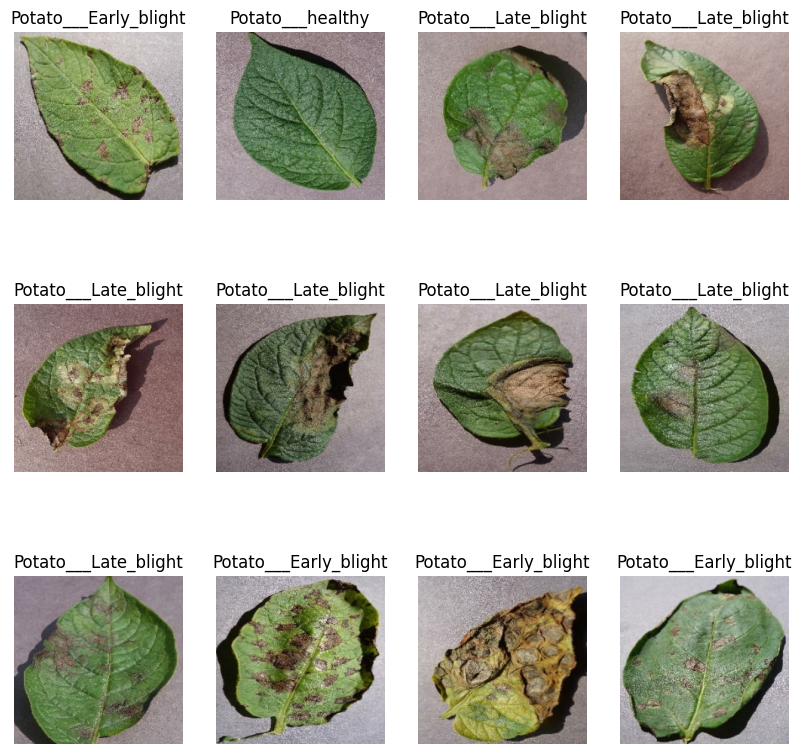

In [192]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Split dataset for trainging

In [195]:
80% ==> trianing
20% ==>10% validation , 10% test

In [202]:
len(dataset)

68

In [196]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [197]:
train_ds = dataset.take(54)
len(train_ds)

54

In [198]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [199]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [200]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [201]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [203]:
#using python
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [204]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [205]:
len(train_ds)

54

In [206]:
len(val_ds)

6

In [207]:
len(test_ds)

8

In [208]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [213]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [214]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])